<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
breast_cancer_csv = '/Users/tresornoel/Desktop/IOD/DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [6]:
#checking the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#check the tail
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [10]:
#Dropping the 'Unnamed' column

df.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Mapping the diagnosis column
bm_map = {
    'B': 0,
    'M': 1
}

df['diagnosis'] = df['diagnosis'].map(bm_map) 

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [12]:
# ANSWER
X= df.drop(columns = ['diagnosis'])
y= df['diagnosis']

In [13]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#Normalize the dataframe

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X))

In [15]:
Xs.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [16]:
# ANSWER
#Printing the correlation matrix

corr_matrix = df.corr()
print(corr_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [17]:
# ANSWER
# Calculate eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(corr_matrix)

# Print eigenvalues
print("Eigenvalues:\n", eig_vals)

# Print eigenvectors
print("Eigenvectors:\n", eig_vecs)

Eigenvalues:
 [1.39177709e+01 5.72635217e+00 2.84684948e+00 1.99836314e+00
 1.65907858e+00 1.20750790e+00 6.84719154e-01 4.84855438e-01
 4.16894830e-01 3.50893638e-01 3.04855395e-01 2.90985845e-01
 2.61010421e-01 2.12275550e-01 1.48576184e-01 8.81625619e-02
 7.98601726e-02 5.90353306e-02 5.14619081e-02 4.82159487e-02
 3.07062788e-02 2.95266509e-02 2.73446674e-02 2.42835925e-02
 1.75522144e-02 1.54733379e-02 8.05614370e-03 6.86973193e-03
 1.32634701e-04 7.41678754e-04 1.58846728e-03]
Eigenvectors:
 [[ 2.16916950e-01 -7.76099428e-02  1.03825983e-01  9.80829303e-02
   8.07832685e-02 -1.20502582e-02  1.46156747e-01  1.82757245e-01
   3.12727329e-04  5.02139227e-02 -6.44348300e-01 -3.19011095e-01
  -3.39503703e-02  4.79306091e-01  2.47454171e-01 -1.77559197e-01
  -4.66616890e-03 -3.86104471e-02  6.07206769e-02  9.19338179e-02
  -3.66629983e-02  5.32798034e-02  2.43929179e-02  1.73954642e-02
   4.94301992e-02 -6.81411410e-03 -2.35299964e-02 -1.24864678e-02
  -1.34843760e-03  5.60685994e-03  

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [18]:
eig_vals = np.array([1.39177709e+01, 5.72635217e+00,  2.84684948e+00 ,1.99836314e+00, 
 1.65907858e+00, 1.20750790e+00, 6.84719154e-01, 4.84855438e-01,
 4.16894830e-01, 3.50893638e-01, 3.04855395e-01, 2.90985845e-01,
 2.61010421e-01, 2.12275550e-01, 1.48576184e-01, 8.81625619e-02,
 7.98601726e-02, 5.90353306e-02, 5.14619081e-02, 4.82159487e-02,
 3.07062788e-02, 2.95266509e-02, 2.73446674e-02, 2.42835925e-02,
 1.75522144e-02, 1.54733379e-02, 8.05614370e-03, 6.86973193e-03,
 1.32634701e-04, 7.41678754e-04, 1.58846728e-03])
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues

    Return a list or array containing the cumulative explained variance
    '''
    # Calculate explained variance for each eigenvalue
    explained_variance = eig_vals / np.sum(eig_vals)
    
    # Calculate cumulative explained variance
    cum_var_exp = np.cumsum(explained_variance) * 100


    return cum_var_exp

In [19]:
# Call the function and capture the result
cum_var_exp = calculate_cum_var_exp(eig_vals)

print(cum_var_exp)

[ 44.89603524  63.36813905  72.55152448  78.9978572   84.3497236
  88.24491038  90.45368185  92.01773165  93.36255369  94.49446865
  95.47787315  96.41653717  97.25850627  97.94326611  98.42254413
  98.70693949  98.96455295  99.1549895   99.32099565  99.47653097
  99.57558348  99.67083075  99.75903935  99.83737352  99.89399357
  99.94390756  99.96989512  99.99205555  99.9924834   99.99487591
 100.        ]


In [20]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,len(eig_vals)])
    ax.set_ylim([0,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)
    plt.grid(True)
    plt.show()




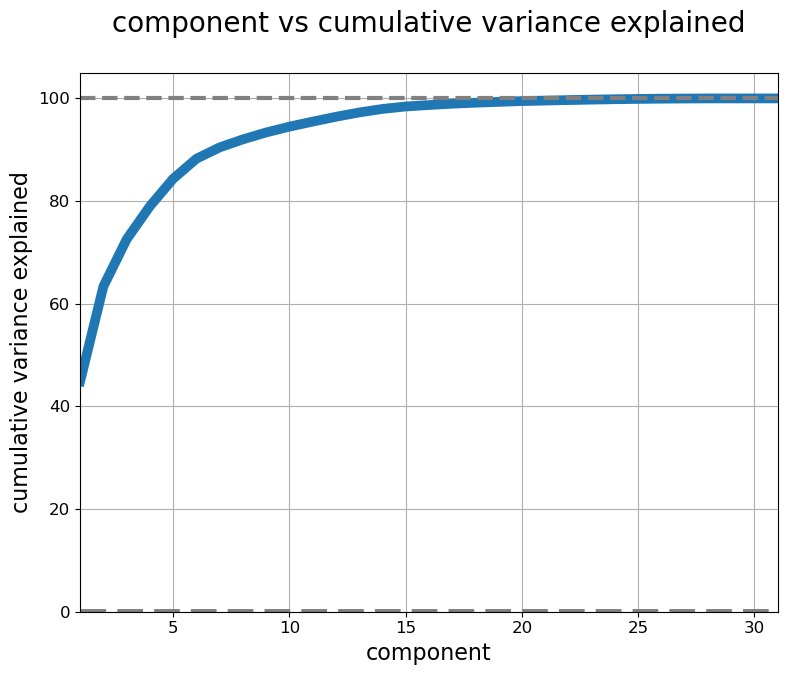

In [21]:
plot_var_exp(eig_vals)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [22]:
# ANSWER

from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(Xs)

PCA()

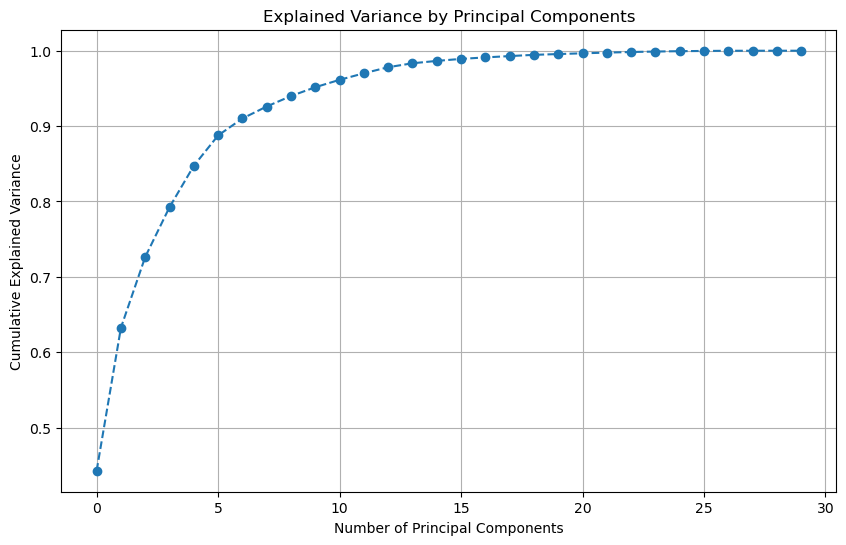

In [23]:
# ANSWER
# Plot explained_variance_
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Show the plot
plt.show()

# Define the number of components to retain
n_components = 16  

# Create a PCA instance with the number of components
pca = PCA(n_components=n_components)

# Apply dimensionality reduction to X
X_pca = pca.fit_transform(Xs)

In [24]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# DataFrame for visualization
pca_df['diagnosis'] = df['diagnosis'].values

/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

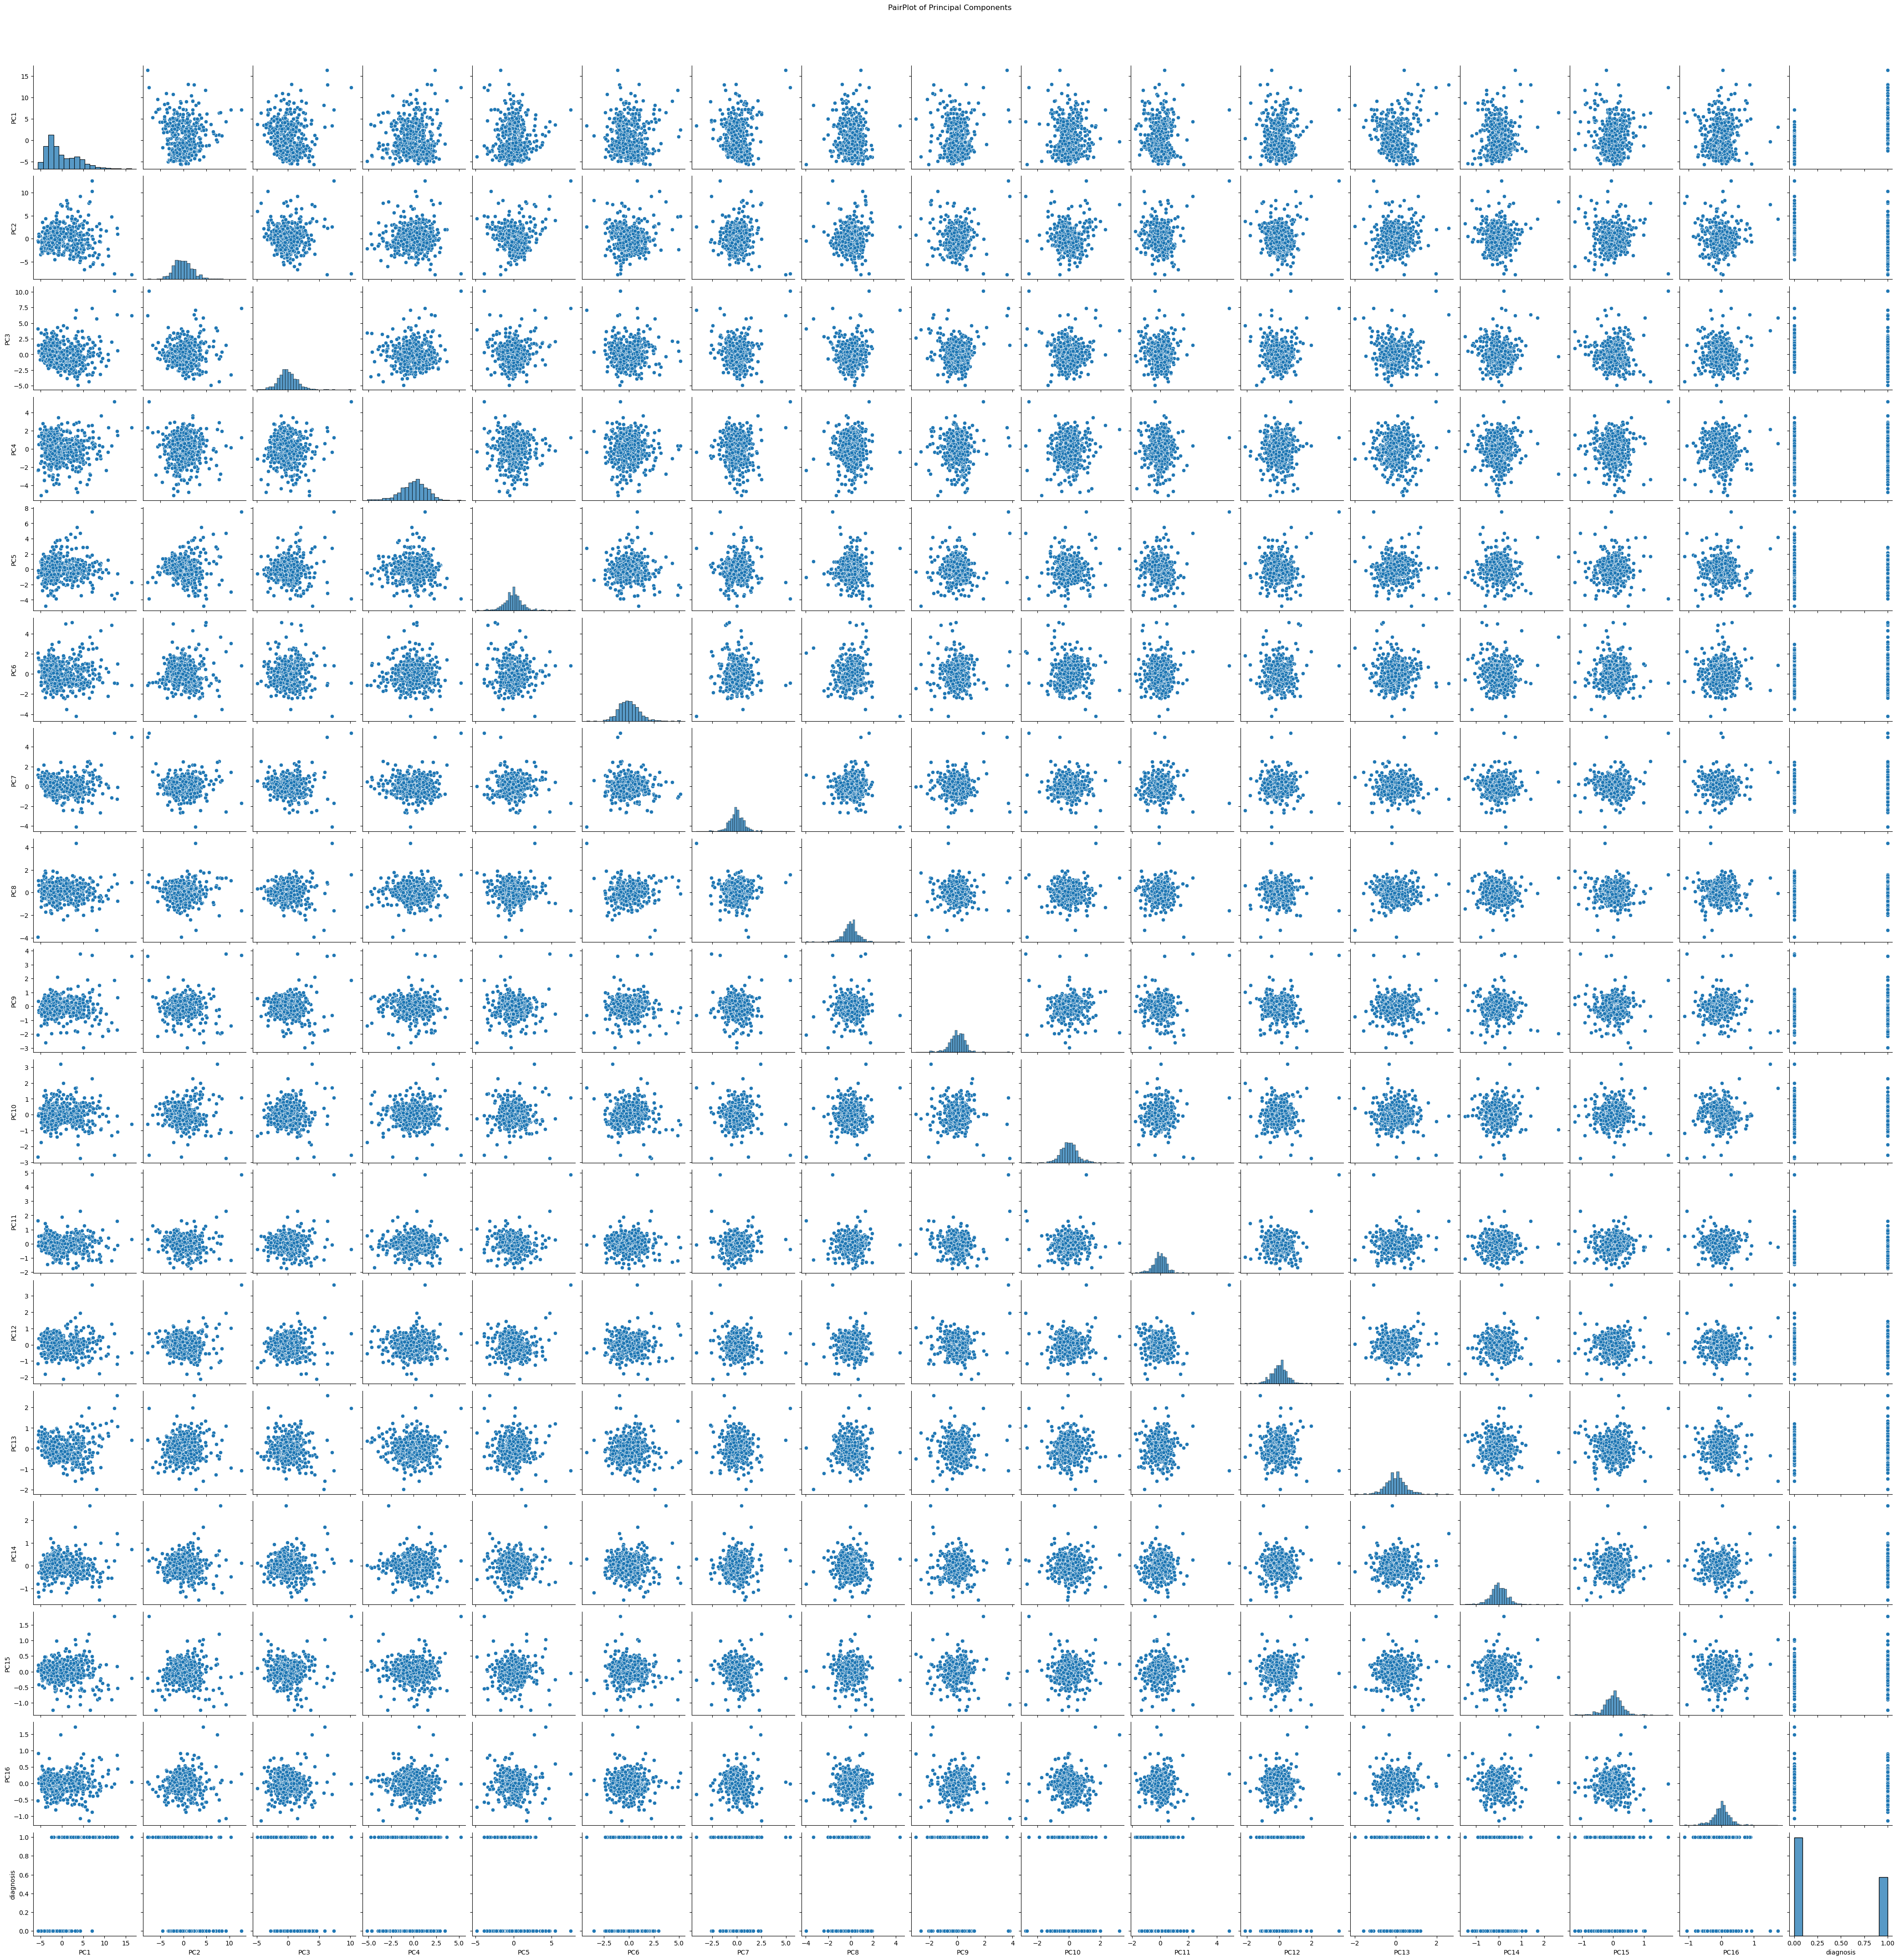

In [26]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(pca_df)
plt.suptitle('PairPlot of Principal Components', y = 1.02)
plt.show()

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the PCA class and set at 16 components
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

# Apply PCA to the standardised features
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.fit_transform(X_test_scaled)

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled
knn_standard = KNeighborsClassifier(n_neighbors=5)
knn_standard.fit(X_train_scaled, y_train)

# Test accuracy of KNN using standardised data
y_pred_standard = knn_standard.predict(X_test_scaled)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f'Accuracy using standardized data: {accuracy_standard:.2f}')

Accuracy using standardized data: 0.95


In [34]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_scaled_pca, y_train)

# Test accuracy of KNN using standardised PCA-transformed data
y_pred_pca = knn_pca.predict(X_test_scaled_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy using standardized PCA-transformed data: {accuracy_pca:.2f}')

Accuracy using standardized PCA-transformed data: 0.94


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



